Just the python code from the excellent https://automating-gis-processes.github.io/site/notebooks/L1/geometric-objects.html# (the entire course is fantastic)

with some minor additions short comments

In [1]:
from shapely.geometry import Point, LineString, Polygon

[Shapely](https://shapely.readthedocs.io/en/stable/manual.html) is a library for geometric objects. Fundamental types are
- `Points`
- `Lines`
- `Polygons`

Shapely can 
- create `Lines` or `Polygons` from `Collections` of `Points`
- calculate things like lengths and areas
- do geometric operations like `Union`, `Difference`, `Distance`
- do spatial queries between geometries like `Intersects`, `Touches`, `Within`

Geometric objects are tuples
- `Points` can be 2-D (x, y) or 3-D (x, y, z)
- `LineString` are sequence of points joined together (i.e. at least two co-ordinate tuples)
- `Polygon` filled area of at least 3 co-ordinate tuples

Geometric collections
- `MultiPoint`, `MultiLineString` and `MultiPolygon` are collections of `Point`, `LineString` and `Polygon` objects (i.e. they consist of multiple parts of the these types of objects)

# Points

In [2]:
point1 = Point(2.2, 4.2)
point2 = Point(7.2, -25.1)
point3 = Point(9.26, -2.456)

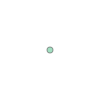

In [3]:
point1

In [4]:
type(point1)

shapely.geometry.point.Point

In [5]:
point1.geom_type

'Point'

getting coordinate of points

In [6]:
point1.coords.xy

(array('d', [2.2]), array('d', [4.2]))

In [7]:
point1.x

2.2

In [8]:
point1.y

4.2

calculating the distance (in decimal degrees) between the points

In [9]:
point1.distance(point2)

29.723559679150142

# LineStrings

In [10]:
line1 = LineString([point1, point2, point3])

In [11]:
line2 = LineString([(5.2, -3.9), (10.2, 8.2)])

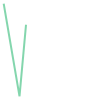

In [12]:
line1

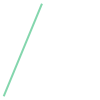

In [13]:
line2

In [14]:
print(line1)

LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456)


In [15]:
line1.geom_type

'LineString'

getting coordinates of linestring

In [16]:
line1.xy

(array('d', [2.2, 7.2, 9.26]), array('d', [4.2, -25.1, -2.456]))

In [17]:
line1.xy[0]

array('d', [2.2, 7.2, 9.26])

getting length of line

In [18]:
line1.length

52.46106912939557

getting the centroid

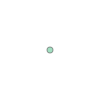

In [19]:
line1.centroid

we see this is a point. Extract its coordinates:

In [20]:
line1.centroid.xy

(array('d', [6.229961354035622]), array('d', [-11.892411157572392]))

# Polygons

In [21]:
poly = Polygon([(p.x, p.y) for p in [point1, point2, point3]])

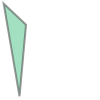

In [22]:
poly

In [23]:
print(poly)

POLYGON ((2.2 4.2, 7.2 -25.1, 9.26 -2.456, 2.2 4.2))


Note the double parentheses. This is because polygons can have holes

In [24]:
poly.geom_type

'Polygon'

Making a polygon with a hole

In [25]:
exterior = [(-180, 90), (-180, -90), (180, -90), (180, 90)]
hole = [(x*0.8, y*0.8) for x, y in exterior]
exterior_poly = Polygon(exterior)

In [26]:
poly_with_hole = Polygon(shell=exterior, holes=[hole])

note we are wrapping `hole` in a `list`, since `holes` expects a `list` argument

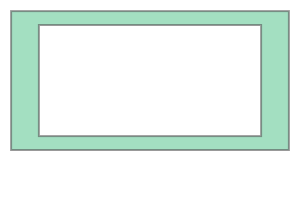

In [27]:
poly_with_hole

In [28]:
print(poly_with_hole)

POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90), (-144 72, -144 -72, 144 -72, 144 72, -144 72))


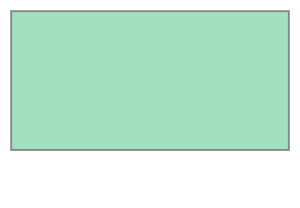

In [29]:
exterior_poly

getting the centroid of a polygon

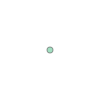

In [30]:
exterior_poly.centroid

In [31]:
exterior_poly.centroid.xy

(array('d', [-0.0]), array('d', [-0.0]))

getting the area

In [32]:
exterior_poly.area

64800.0

getting a bounding box

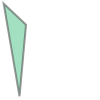

In [33]:
poly

In [34]:
poly.bounds

(2.2, -25.1, 9.26, 4.2)

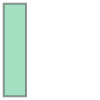

In [35]:
poly.envelope

In [36]:
poly.envelope.exterior.coords.xy

(array('d', [2.2, 9.26, 9.26, 2.2, 2.2]),
 array('d', [-25.1, -25.1, 4.2, 4.2, -25.1]))

get the exterior ring

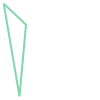

In [37]:
poly.exterior

In [38]:
poly.envelope.exterior.geom_type

'LinearRing'

In [39]:
poly.envelope.exterior.length

72.72

this is again in decimal degrees

# Geometry collections

In [40]:
from shapely.geometry import MultiPoint, MultiLineString, MultiPolygon, box

## MultiPoints

The same thing can be achieved as usual passing geometry objects or the coordinates defining them

In [41]:
multi_point1 = MultiPoint([point1, point2, point3])
multi_point2 = MultiPoint([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

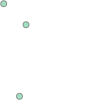

In [42]:
multi_point1

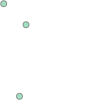

In [43]:
multi_point2

In [44]:
print(multi_point1)

MULTIPOINT (2.2 4.2, 7.2 -25.1, 9.26 -2.456)


## MultiLines

In [45]:
line1 = LineString([point1, point2])
line2 = LineString([point2, point3])
multi_line = MultiLineString([line1, line2])

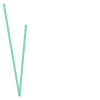

In [46]:
multi_line

In [47]:
line1.geom_type

'LineString'

In [48]:
multi_line.geom_type

'MultiLineString'

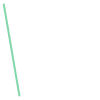

In [49]:
multi_line[0]

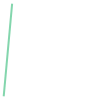

In [50]:
multi_line[1]

In [51]:
multi_line[0].geom_type

'LineString'

In [52]:
print(multi_line)

MULTILINESTRING ((2.2 4.2, 7.2 -25.1), (7.2 -25.1, 9.26 -2.456))


## MultiPolys

For polygons, create two hemispheres with a hole in the western one

In [53]:
west_exterior = [(-180, 90), (-180, -90), (0, -90), (0, 90)]
west_hole = [[(-170, 80), (-170, -80), (-10, -80), (-10, 80)]]
west_poly = Polygon(shell=west_exterior, holes=west_hole)

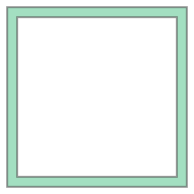

In [54]:
west_poly

For the eastern part, create a bounding box

In [55]:
min_x, min_y, max_x, max_y = 0, -90, 180, 90
east_poly_box = box(minx=min_x, miny=min_y, maxx=max_x, maxy=max_y)

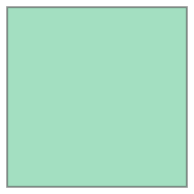

In [56]:
east_poly_box

In [57]:
multi_poly = MultiPolygon([west_poly, east_poly_box])

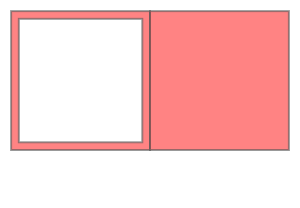

In [58]:
multi_poly

## Attributes and methods for Geometry collections

convex hull

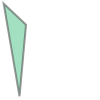

In [59]:
multi_point1.convex_hull

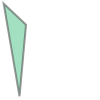

In [60]:
multi_line.convex_hull

The collections have a number of elements we can get via `len`

In [61]:
len(multi_point1)

3

In [62]:
len(multi_line)

2

For the MultiPolygon, we can calculate area as usual

In [63]:
multi_poly.area

39200.0

Recall its weird shape

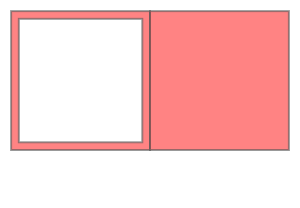

In [64]:
multi_poly

In [65]:
multi_poly[0].area

6800.0

In [66]:
multi_poly[1].area

32400.0

Valid MultiPolygons are those whose shapes do not intersect one another. In `multi_polygon` created above, the two hemispheres share the 0-meridian. Hence this will not be a valid polyon

In [67]:
multi_poly.is_valid

False

We can slightly modify things to get a valid one

In [68]:
min_x, min_y, max_x, max_y = 0.0000001, -90, 180, 90
east_poly_box = box(minx=min_x, miny=min_y, maxx=max_x, maxy=max_y)

In [69]:
multi_poly = MultiPolygon([west_poly, east_poly_box])

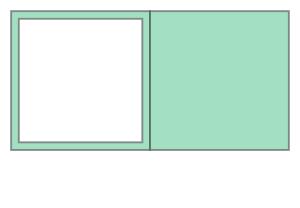

In [70]:
multi_poly

In [71]:
multi_poly.is_valid

True

In [72]:
multi_poly.area

39199.999982